In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt


In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print mnist.train.images.shape, mnist.train.labels.shape
print mnist.validation.images.shape, mnist.validation.labels.shape
print mnist.test.images.shape, mnist.test.labels.shape

(55000, 784) (55000, 10)
(5000, 784) (5000, 10)
(10000, 784) (10000, 10)


In [4]:
BATCH_SIZE = 100
TRAINING_ITER = 5000
LEARNING_RATE = 0.5

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

weights = tf.Variable(tf.random_uniform([784, 10]))
biases = tf.Variable(tf.zeros([10]) + 0.1)

predictions = tf.nn.softmax(tf.matmul(x, weights) + biases)

cross_entropy = tf.reduce_mean(tf.reduce_sum(-y * tf.log(predictions), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(y, 1), tf.arg_max(predictions, 1)), tf.float32))

In [5]:
init = tf.global_variables_initializer()
epoch = []
train_acc = []
valid_acc = []

with tf.Session() as sess:
    sess.run(init)
    

    
    for i in range(TRAINING_ITER):
        batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
        sess.run(train_step, feed_dict = {x: batch_xs, y: batch_ys})
        
        if i % 100 == 0:
            epoch.append(i)
            train_accuracy = sess.run(accuracy, feed_dict = {x: batch_xs, y: batch_ys})
            train_acc.append(train_accuracy)
            print 'TRAIN_ACC@%d:' %i, train_accuracy
            
            valid_accuracy = sess.run(accuracy, feed_dict = {x: mnist.validation.images, y: mnist.validation.labels})
            valid_acc.append(valid_accuracy)
            print 'VALID_ACC@%d:' %i, valid_accuracy
        

    print 'TEST_ACC:', sess.run(accuracy, feed_dict = {x: mnist.test.images, y: mnist.test.labels})

TRAIN_ACC@0: 0.19
VALID_ACC@0: 0.1356
TRAIN_ACC@100: 0.93
VALID_ACC@100: 0.8602
TRAIN_ACC@200: 0.92
VALID_ACC@200: 0.8898
TRAIN_ACC@300: 0.95
VALID_ACC@300: 0.8932
TRAIN_ACC@400: 0.88
VALID_ACC@400: 0.9
TRAIN_ACC@500: 0.93
VALID_ACC@500: 0.9082
TRAIN_ACC@600: 0.91
VALID_ACC@600: 0.91
TRAIN_ACC@700: 0.89
VALID_ACC@700: 0.9122
TRAIN_ACC@800: 0.95
VALID_ACC@800: 0.9168
TRAIN_ACC@900: 0.93
VALID_ACC@900: 0.9122
TRAIN_ACC@1000: 0.93
VALID_ACC@1000: 0.9166
TRAIN_ACC@1100: 0.9
VALID_ACC@1100: 0.913
TRAIN_ACC@1200: 0.95
VALID_ACC@1200: 0.9178
TRAIN_ACC@1300: 0.95
VALID_ACC@1300: 0.9224
TRAIN_ACC@1400: 0.98
VALID_ACC@1400: 0.9188
TRAIN_ACC@1500: 0.92
VALID_ACC@1500: 0.9224
TRAIN_ACC@1600: 0.91
VALID_ACC@1600: 0.9162
TRAIN_ACC@1700: 0.88
VALID_ACC@1700: 0.924
TRAIN_ACC@1800: 0.94
VALID_ACC@1800: 0.9118
TRAIN_ACC@1900: 0.92
VALID_ACC@1900: 0.9244
TRAIN_ACC@2000: 0.92
VALID_ACC@2000: 0.9188
TRAIN_ACC@2100: 0.91
VALID_ACC@2100: 0.9214
TRAIN_ACC@2200: 0.92
VALID_ACC@2200: 0.9252
TRAIN_ACC@2300: 0.95

<IPython.core.display.Javascript object>


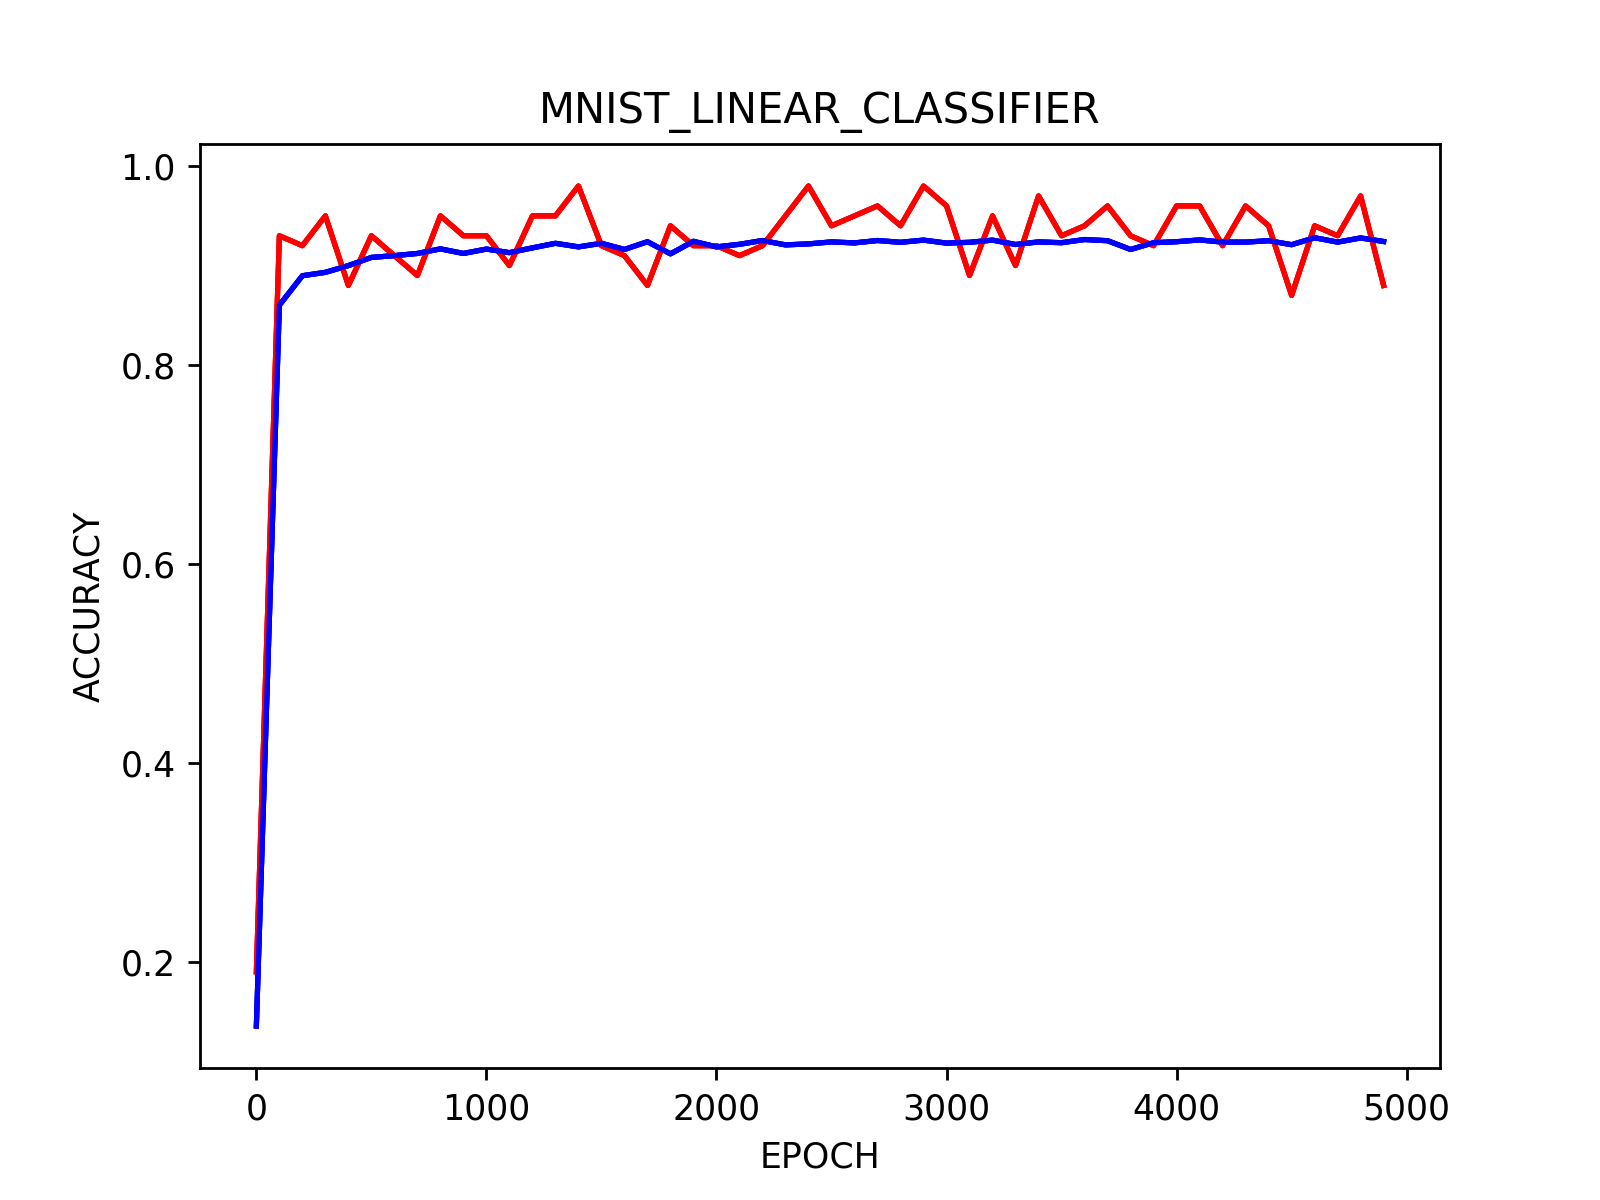

In [8]:
plt.plot(epoch, train_acc, 'r-')
plt.plot(epoch, valid_acc, 'b-')
plt.title('MNIST_LINEAR_CLASSIFIER')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.show()